In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
comp = pd.read_csv('Company_Data.csv')
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

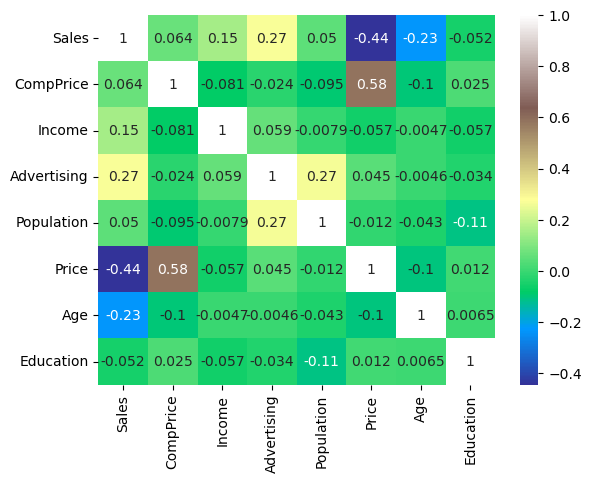

In [5]:
import seaborn as sns 
sns.heatmap(comp.corr(), annot=True, cmap='terrain')

In [6]:
comp2 = pd.get_dummies(comp, columns=['ShelveLoc','Urban','US'], drop_first=True)
comp2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [7]:
comp2['sales_cat'] = pd.cut(comp2['Sales'], bins=[0,5,10,20], labels=['Poor', 'Average', ' Good'])
comp2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_cat
0,9.50,138,73,11,276,120,42,17,0,0,1,1,Average
1,11.22,111,48,16,260,83,65,10,1,0,1,1,Good
2,10.06,113,35,10,269,80,59,12,0,1,1,1,Good
3,7.40,117,100,4,466,97,55,14,0,1,1,1,Average
4,4.15,141,64,3,340,128,38,13,0,0,1,0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,Good
396,6.14,139,23,3,37,120,55,11,0,1,0,1,Average
397,7.41,162,26,12,368,159,40,18,0,1,1,1,Average
398,5.94,100,79,7,284,95,50,12,0,0,1,1,Average


In [8]:
comp2.sales_cat.value_counts()

Average    245
 Good       78
Poor        76
Name: sales_cat, dtype: int64

In [9]:
comp3 = comp2.drop(['Sales'], axis=1)

In [10]:
comp3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_cat
0,138,73,11,276,120,42,17,0,0,1,1,Average
1,111,48,16,260,83,65,10,1,0,1,1,Good
2,113,35,10,269,80,59,12,0,1,1,1,Good
3,117,100,4,466,97,55,14,0,1,1,1,Average
4,141,64,3,340,128,38,13,0,0,1,0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,Good
396,139,23,3,37,120,55,11,0,1,0,1,Average
397,162,26,12,368,159,40,18,0,1,1,1,Average
398,100,79,7,284,95,50,12,0,0,1,1,Average


In [11]:
lc=LabelEncoder()
comp3['sales_cat'] = lc.fit_transform(comp3['sales_cat'])
comp3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_cat
0,138,73,11,276,120,42,17,0,0,1,1,1
1,111,48,16,260,83,65,10,1,0,1,1,0
2,113,35,10,269,80,59,12,0,1,1,1,0
3,117,100,4,466,97,55,14,0,1,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,0
396,139,23,3,37,120,55,11,0,1,0,1,1
397,162,26,12,368,159,40,18,0,1,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1,1


In [12]:
array = comp3.values

In [13]:
x = array[:,:-1]
x

array([[138,  73,  11, ...,   0,   1,   1],
       [111,  48,  16, ...,   0,   1,   1],
       [113,  35,  10, ...,   1,   1,   1],
       ...,
       [162,  26,  12, ...,   1,   1,   1],
       [100,  79,   7, ...,   0,   1,   1],
       [134,  37,   0, ...,   0,   1,   1]], dtype=int64)

In [14]:
y = array[:,-1]
y

array([1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1,
       1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1,

In [15]:
num_trees = 100
max_features= 4
kfold = KFold(n_splits= 4, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results= cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.6975


In [16]:
num_trees = 200
max_features= 3
kfold = KFold(n_splits= 5, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results= cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.68


In [17]:
num_trees = 200
max_features= 4
kfold = KFold(n_splits= 5, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results= cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.6950000000000001


In [18]:
num_trees = 400
max_features= 4
kfold = KFold(n_splits= 5, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results= cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7050000000000001


In [19]:
num_trees = 440
max_features= 4
kfold = KFold(n_splits= 5, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results= cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.6900000000000001
